In [1]:
import os          
import cv2                                 
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import tensorflow as tf
from sklearn.metrics import *         
import matplotlib.pyplot as plt 
import sklearn.model_selection as model_selection
from keras.optimizers import Adam
opt = Adam(learning_rate=0.001)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import os
import cv2

def load_data(dataset):
    images = []
    labels = []
    class_names = os.listdir(dataset)
    
    for label_index, folder in enumerate(class_names):
        folder_path = os.path.join(dataset, folder)
        for file in os.listdir(folder_path):
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):  # check for image files only
                img_path = os.path.join(folder_path, file)
                image = cv2.imread(img_path)
                if image is None:
                    print(f"Warning: Unable to read image: {img_path}")
                    continue  # skip bad images
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, (150, 150))
                images.append(image)
                labels.append(label_index)
    
    return np.array(images), np.array(labels), class_names

In [3]:
dataset = 'D:/Indhu/DATASET/fruit/images/'
images, labels, class_names = load_data(dataset)

In [4]:
images = np.array(images, dtype = 'float32')
labels = np.array(labels, dtype = 'int32') 

In [5]:
images = images/255.0

In [6]:
train_images, test_images, train_labels, test_labels = model_selection.train_test_split(images, labels, train_size=0.80,test_size=0.20, random_state=101) 

In [7]:
import numpy as np
print(np.unique(train_labels))


[0 1 2 3 4 5 6 7 8]


In [8]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models

# Load the InceptionV3 base model (excluding the top classifier layers)
base_model = InceptionV3(include_top=False, weights='imagenet', input_shape=train_images.shape[1:])

# Freeze the base model
base_model.trainable = False

# Build the model
InceptionV3_model = tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(40, activation='softmax')  # assuming 10 classes
])

# Compile the model
InceptionV3_model.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

# Train the model
history_InceptionV3 = InceptionV3_model.fit(train_images, train_labels,
                                        batch_size=128,
                                        epochs=10,
                                        validation_split=0.2)

# Evaluate the model
InceptionV3_evaluate = InceptionV3_model.evaluate(test_images, test_labels)


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.1301 - loss: 4.6311 - val_accuracy: 0.5517 - val_loss: 1.3956
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 780ms/step - accuracy: 0.5759 - loss: 1.5239 - val_accuracy: 0.7931 - val_loss: 0.6591
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step - accuracy: 0.7173 - loss: 1.0724 - val_accuracy: 0.7931 - val_loss: 1.0087
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 813ms/step - accuracy: 0.8042 - loss: 0.7628 - val_accuracy: 0.8103 - val_loss: 0.7815
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step - accuracy: 0.8995 - loss: 0.4257 - val_accuracy: 0.8276 - val_loss: 0.6506
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 768ms/step - accuracy: 0.8771 - loss: 0.3567 - val_accuracy: 0.7931 - val_loss: 0.9893
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 802ms/step - accuracy: 0.8800 - loss: 0.3664 - val_accuracy: 0.7586 - val_loss: 0.9230
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 860ms/step - accuracy: 0.9442 - loss: 0.1777 - val_accuracy: 0.8103 - val_loss: 0.

In [9]:
import tensorflow as tf

# Load ResNet50 base model without top layers (we'll customize the classifier part)
base_model = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=train_images.shape[1:])
base_model.trainable = False  # freeze base for feature extraction (optional)

# Build the model
ResNet50_model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(40, activation='softmax')  # for 40 classes
])

# Compile the model
ResNet50_model.compile(optimizer='adam', 
                       loss='sparse_categorical_crossentropy', 
                       metrics=['accuracy'])

# Train the model
history_ResNet50 = ResNet50_model.fit(train_images, train_labels, 
                                      batch_size=128, 
                                      epochs=10, 
                                      validation_split=0.2)

# Evaluate on test data
ResNet50_evaluate = ResNet50_model.evaluate(test_images, test_labels)


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.0314 - loss: 3.8135 - val_accuracy: 0.0517 - val_loss: 2.9357
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.0872 - loss: 3.0106 - val_accuracy: 0.0517 - val_loss: 2.5331
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.0956 - loss: 2.5953 - val_accuracy: 0.0517 - val_loss: 2.3660
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.1702 - loss: 2.3829 - val_accuracy: 0.0862 - val_loss: 2.2748
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.1319 - loss: 2.4406 - val_accuracy: 0.1207 - val_loss: 2.2200
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.1177 - loss: 2.4074 - val_accuracy: 0.1724 - val_loss: 2.2045
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.1734 - loss: 2.2366 - val_accuracy: 0.1379 - val_loss: 2.1889
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.1131 - loss: 2.3953 - val_accuracy: 0.1897 - val_loss: 2.1723
Epoch 9/10
2/2 

In [10]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import tensorflow as tf

# Load VGG16 without the top (classifier), using pretrained ImageNet weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False  # Freeze the convolutional base

# Build the full model
VGG16_model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(40, activation='softmax')  # Your 40-class classifier
])

# Compile the model
VGG16_model.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

# Train the model
history_VGG16 = VGG16_model.fit(train_images, train_labels,
                                batch_size=128,
                                epochs=10,
                                validation_split=0.2)
VGG16_evaluate = VGG16_model.evaluate(test_images, test_labels)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 3s/step - accuracy: 0.0884 - loss: 3.8495 - val_accuracy: 0.3966 - val_loss: 1.8602
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.4733 - loss: 1.7844 - val_accuracy: 0.4138 - val_loss: 1.6022
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.6496 - loss: 1.1323 - val_accuracy: 0.5690 - val_loss: 1.2016
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.7530 - loss: 0.8244 - val_accuracy: 0.6034 - val_loss: 1.0623
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.8341 - loss: 0.5114 - val_accuracy: 0.6379 - val_loss: 0.9591
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 3s/step - accuracy: 0.8852 - loss: 0.3609 - val_accuracy: 0.6552 - val_loss: 0.9830
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 5s/step - accuracy: 0.9021 - loss: 0.3015 - val_accuracy: 0.6552 - val_loss: 0.9945
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step - accuracy: 0.9190 - loss: 0.2507 - val_accuracy: 0.6552 - val_loss: 0.9254
Epoch 9/10
2/2 ━

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define AlexNet-like architecture
def build_alexnet(input_shape=(150, 150, 3), num_classes=40):
    model = models.Sequential()

    model.add(layers.Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=2))

    model.add(layers.Conv2D(256, (5, 5), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=2))

    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(384, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=2))

    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Create the model
alexnet_model = build_alexnet()

# Freeze feature extraction layers (up to the flatten layer)
for layer in alexnet_model.layers[:-4]:
    layer.trainable = False

# Compile the model
alexnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_alexnet = alexnet_model.fit(train_images, train_labels, batch_size=128, epochs=10, validation_split=0.2)

alexnet_evaluate = alexnet_model.evaluate(test_images, test_labels)


C:\ProgramData\Anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 609ms/step - accuracy: 0.0204 - loss: 3.5616 - val_accuracy: 0.1552 - val_loss: 2.7344
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 468ms/step - accuracy: 0.1310 - loss: 2.5943 - val_accuracy: 0.1379 - val_loss: 2.3249
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 453ms/step - accuracy: 0.1095 - loss: 2.2340 - val_accuracy: 0.2241 - val_loss: 2.2365
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 409ms/step - accuracy: 0.1800 - loss: 2.2065 - val_accuracy: 0.1897 - val_loss: 2.1587
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 440ms/step - accuracy: 0.1773 - loss: 2.1517 - val_accuracy: 0.1897 - val_loss: 2.1460
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 438ms/step - accuracy: 0.1825 - loss: 2.1286 - val_accuracy: 0.2414 - val_loss: 2.1587
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 457ms/step - accuracy: 0.1630 - loss: 2.0804 - val_accuracy: 0.1207 - val_loss: 2.1439
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 471ms/step - accuracy: 0.2169 - loss: 2.1042 - val_accuracy: 0.2414 - val_loss:

In [12]:
import tensorflow as tf

# Define the original LeNet model
LeNet = tf.keras.Sequential()
LeNet.add(tf.keras.layers.Conv2D(6, 5, activation='tanh', input_shape=train_images.shape[1:], padding='valid'))
LeNet.add(tf.keras.layers.AveragePooling2D(2))
LeNet.add(tf.keras.layers.Activation('sigmoid'))

LeNet.add(tf.keras.layers.Conv2D(16, 5, activation='tanh'))
LeNet.add(tf.keras.layers.AveragePooling2D(2))
LeNet.add(tf.keras.layers.Activation('sigmoid'))

LeNet.add(tf.keras.layers.Conv2D(120, 5, activation='tanh'))
LeNet.add(tf.keras.layers.Flatten())

# Freeze convolutional layers (feature extractor)
for layer in LeNet.layers[:-2]:  # freezing all but Dense layers
    layer.trainable = False

# Add / keep classifier layers
LeNet.add(tf.keras.layers.Dense(84, activation='tanh'))
LeNet.add(tf.keras.layers.Dense(40, activation='softmax'))  # 10 classes

# Compile the model
LeNet.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_LeNet = LeNet.fit(train_images, train_labels, batch_size=128, epochs=10, validation_split=0.2)

# Evaluate
LeNet_evaluate = LeNet.evaluate(test_images, test_labels)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 389ms/step - accuracy: 0.0262 - loss: 3.5077 - val_accuracy: 0.0690 - val_loss: 2.8789
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - accuracy: 0.1203 - loss: 2.7440 - val_accuracy: 0.0690 - val_loss: 2.7602
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.1072 - loss: 2.6365 - val_accuracy: 0.0690 - val_loss: 2.6506
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.1281 - loss: 2.5397 - val_accuracy: 0.0690 - val_loss: 2.5596
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.1151 - loss: 2.4539 - val_accuracy: 0.0690 - val_loss: 2.3903
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.1177 - loss: 2.3924 - val_accuracy: 0.0690 - val_loss: 2.3443
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - accuracy: 0.1310 - loss: 2.3333 - val_accuracy: 0.1207 - val_loss: 2.3153
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step - accuracy: 0.0924 - loss: 2.3103 - val_accuracy: 0.0862 - val_loss:

In [17]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Assume train_images, train_labels, test_images, test_labels are already loaded
# train_images shape: (num_samples, 150, 150, 3)

# Step 1: Resize and normalize images
train_images_resized = tf.image.resize(train_images, [224, 224])
train_images_resized = tf.cast(train_images_resized, tf.float32) / 255.0

test_images_resized = tf.image.resize(test_images, [224, 224])
test_images_resized = tf.cast(test_images_resized, tf.float32) / 255.0

# Step 2: Load MobileNetV2 base model (without top layers)
base_model = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3),
                                               include_top=False,
                                               weights='imagenet')  # or weights=None for random

base_model.trainable = False  # Freeze feature extractor

# Step 3: Build full model with classifier
model_mobilenet = tf.keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(40, activation='softmax')  # 40 classes
])

# Step 4: Compile
model_mobilenet.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

# Step 5: Train
history_mobile = model_mobilenet.fit(train_images_resized, train_labels,
                                     epochs=10,
                                     batch_size=128,
                                     validation_split=0.2)


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.0512 - loss: 4.0513 - val_accuracy: 0.0517 - val_loss: 2.6897
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.1141 - loss: 2.8043 - val_accuracy: 0.0862 - val_loss: 2.4321
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.0863 - loss: 2.7338 - val_accuracy: 0.1379 - val_loss: 2.2888
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.1307 - loss: 2.7003 - val_accuracy: 0.1207 - val_loss: 2.2331
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.1008 - loss: 2.6365 - val_accuracy: 0.0517 - val_loss: 2.2642
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.0910 - loss: 2.7295 - val_accuracy: 0.0517 - val_loss: 2.2970
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.1339 - loss: 2.5199 - val_accuracy: 0.0690 - val_loss: 2.3095
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.0895 - loss: 2.5776 - val_accuracy: 0.0862 - val_loss: 2.3147
Epoch 9/10
2/2 ━

In [22]:

# Evaluate
mobilenet_evaluate = model_mobilenet.evaluate(test_images_resized, test_labels)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 219ms/step - accuracy: 0.0846 - loss: 2.2992


In [24]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
import numpy as np

# Assume train_images, train_labels, test_images, test_labels are already loaded
# and your original image shape is (150, 150, 3)

# Step 1: Resize the images to 224x224
train_images_resized = tf.image.resize(train_images, [224, 224]).numpy()
test_images_resized = tf.image.resize(test_images, [224, 224]).numpy()

# Step 2: Load EfficientNetB0 without top layer
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base

# Step 3: Add custom classification head
model_efficient = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(40, activation='softmax')  # for 40 classes
])

# Step 4: Compile the model
model_efficient.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

# Step 5: Train the model
history_eff = model_efficient.fit(train_images_resized, train_labels,
                                  epochs=10,
                                  batch_size=128,
                                  validation_split=0.2)

# Evaluate
efficient_evaluate = model_efficient.evaluate(test_images_resized, test_labels)


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.0346 - loss: 3.6444 - val_accuracy: 0.0862 - val_loss: 3.0074
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.1037 - loss: 2.9995 - val_accuracy: 0.1379 - val_loss: 2.6651
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.1287 - loss: 2.6961 - val_accuracy: 0.1379 - val_loss: 2.5136
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.0788 - loss: 2.6420 - val_accuracy: 0.1379 - val_loss: 2.4307
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.1348 - loss: 2.4909 - val_accuracy: 0.0517 - val_loss: 2.3765
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.1540 - loss: 2.5135 - val_accuracy: 0.0862 - val_loss: 2.3273
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.1281 - loss: 2.6269 - val_accuracy: 0.0862 - val_loss: 2.2827
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step - accuracy: 0.0982 - loss: 2.4680 - val_accuracy: 0.0517 - val_loss: 2.2611
Epoch 9/10
2/2 

In [33]:
alexnet = history_alexnet.history
LeNet = history_LeNet.history
InceptionV3 = history_InceptionV3.history
ResNet50 = history_ResNet50.history
VGG16 = history_VGG16.history
mobile = history_mobile.history 
efficient = history_mobile.history 


comparison = pd.DataFrame()

comparison['alexnet_accuracy']  =alexnet['accuracy']
comparison['alexnet_val_accuracy'] = alexnet['val_accuracy']
comparison['alexnet_loss']  = alexnet['loss']
comparison['alexnet_val_loss'] = alexnet['val_loss']

comparison['LeNet_accuracy']  = LeNet['accuracy']
comparison['LeNet_val_accuracy'] = LeNet['val_accuracy']
comparison['LeNet_loss']  = LeNet['loss']
comparison['LeNet_val_loss'] = LeNet['val_loss']

comparison['InceptionV3_accuracy']  = InceptionV3['accuracy']
comparison['InceptionV3_val_accuracy'] =InceptionV3['val_accuracy']
comparison['InceptionV3_loss']  = InceptionV3['loss']
comparison['InceptionV3_val_loss'] = InceptionV3['val_loss']

comparison['ResNet50_accuracy']  = ResNet50['accuracy']
comparison['ResNet50_val_accuracy'] = ResNet50['val_accuracy']
comparison['ResNet50_loss']  = ResNet50['loss']
comparison['ResNet50_val_loss'] = ResNet50['val_loss']

comparison['VGG16_accuracy']  = VGG16['accuracy']
comparison['VGG16_val_accuracy'] = VGG16['val_accuracy']
comparison['VGG16_loss']  = VGG16['loss']
comparison['VGG16_val_loss'] = VGG16['val_loss']

comparison['mobile_accuracy']  = mobile['accuracy']
comparison['mobile_val_accuracy'] = mobile['val_accuracy']
comparison['mobile_loss']  = mobile['loss']
comparison['mobile_val_loss'] = mobile['val_loss']

comparison['efficient_accuracy']  = efficient['accuracy']
comparison['efficient_val_accuracy'] = efficient['val_accuracy']
comparison['efficient_loss']  = efficient['loss']
comparison['efficient_val_loss'] = efficient['val_loss']


comparison

,alexnet_accuracy,alexnet_val_accuracy,alexnet_loss,alexnet_val_loss,LeNet_accuracy,LeNet_val_accuracy,LeNet_loss,LeNet_val_loss,InceptionV3_accuracy,InceptionV3_val_accuracy,...,VGG16_loss,VGG16_val_loss,mobile_accuracy,mobile_val_accuracy,mobile_loss,mobile_val_loss,efficient_accuracy,efficient_val_accuracy,efficient_loss,efficient_val_loss
0,0.030568,0.155172,3.489856,2.734374,0.039301,0.068966,3.369551,2.878941,0.183406,0.551724,...,3.643895,1.860204,0.061135,0.051724,3.888184,2.689698,0.061135,0.051724,3.888184,2.689698
1,0.122271,0.137931,2.548240,2.324888,0.117904,0.068966,2.726383,2.760173,0.598253,0.793103,...,1.781667,1.602200,0.104803,0.086207,2.825704,2.432075,0.104803,0.086207,2.825704,2.432075
2,0.113537,0.224138,2.223398,2.236478,0.117904,0.068966,2.626623,2.650610,0.720524,0.793103,...,1.105974,1.201560,0.078603,0.137931,2.760643,2.288837,0.078603,0.137931,2.760643,2.288837
3,0.152838,0.189655,2.221144,2.158702,0.117904,0.068966,2.536720,2.559558,0.807860,0.810345,...,0.815413,1.062278,0.117904,0.120690,2.727958,2.233126,0.117904,0.120690,2.727958,2.233126
4,0.187773,0.189655,2.140616,2.146009,0.117904,0.068966,2.458143,2.390340,0.903930,0.827586,...,0.528558,0.959050,0.100437,0.051724,2.634448,2.264170,0.100437,0.051724,2.634448,2.264170
5,0.187773,0.241379,2.132528,2.158743,0.117904,0.068966,2.381214,2.344336,0.882096,0.793103,...,0.362745,0.982958,0.109170,0.051724,2.685128,2.297008,0.109170,0.051724,2.685128,2.297008
6,0.170306,0.120690,2.076495,2.143857,0.122271,0.120690,2.335067,2.315252,0.886463,0.758621,...,0.305550,0.994506,0.126638,0.068966,2.528364,2.309526,0.126638,0.068966,2.528364,2.309526
7,0.196507,0.241379,2.125148,2.097675,0.091703,0.086207,2.302622,2.299043,0.947598,0.810345,...,0.244713,0.925439,0.087336,0.086207,2.581459,2.314664,0.087336,0.086207,2.581459,2.314664
8,0.192140,0.241379,2.114259,2.080090,0.122271,0.086207,2.277509,2.292472,0.951965,0.793103,...,0.194929,0.873564,0.113537,0.137931,2.462973,2.318599,0.113537,0.137931,2.462973,2.318599
9,0.240175,0.275862,2.048615,2.087836,0.122271,0.086207,2.259931,2.293377,0.947598,0.810345,...,0.134112,0.858416,0.170306,0.137931,2.382691,2.311496,0.170306,0.137931,2.382691,2.311496


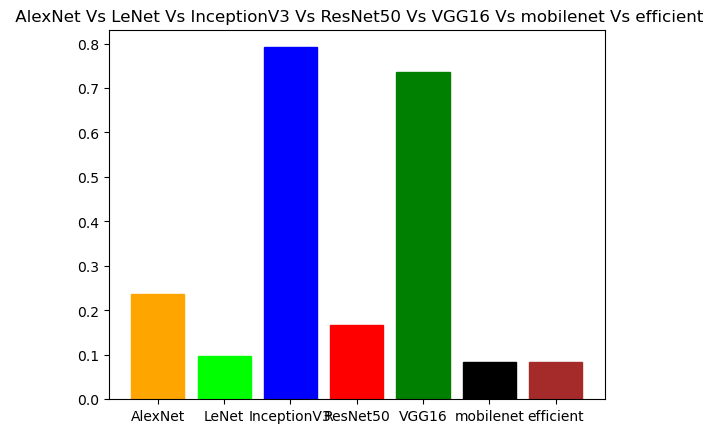

In [35]:
accuracy =[alexnet_evaluate[1], LeNet_evaluate[1], InceptionV3_evaluate[1], ResNet50_evaluate[1], VGG16_evaluate[1], mobilenet_evaluate[1], efficient_evaluate[1]]
lable = ["AlexNet" , "LeNet", "InceptionV3", "ResNet50", "VGG16", "mobilenet", "efficient"]

barlist = plt.bar(lable,accuracy)

barlist[0].set_color('orange')
barlist[1].set_color('lime')
barlist[2].set_color('blue')
barlist[3].set_color('red')
barlist[4].set_color('green')
barlist[5].set_color('black')
barlist[6].set_color('brown')


plt.title(" AlexNet Vs LeNet Vs InceptionV3 Vs ResNet50 Vs VGG16 Vs mobilenet Vs efficient")

plt.show()